# YOLOV8预训练模型预测-Python API-图像

 2023-4-15

## 导入工具包

In [2]:
from ultralytics import YOLO

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import torch
# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device:', device)

device: cpu


## 载入模型

In [4]:
# 载入预训练模型
# model = YOLO('yolov8n-pose.pt')
# model = YOLO('yolov8s-pose.pt')
# model = YOLO('yolov8m-pose.pt')
# model = YOLO('yolov8l-pose.pt')
# model = YOLO('yolov8x-pose.pt')
# model = YOLO('yolov8x-pose-p6.pt')
model = YOLO('../models/yolov8_s_poker.pt')

## 计算设备

In [5]:
# 切换计算设备
model.to(device)
# model.cpu()  # CPU
# model.cuda() # GPU

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

## 模型自带信息

In [6]:
model.device

device(type='cpu')

In [8]:
model.names

{0: '10梅花',
 1: '10方块',
 2: '10红桃',
 3: '10黑桃',
 4: '2梅花',
 5: '2方块',
 6: '2红桃',
 7: '2黑桃',
 8: '3梅花',
 9: '3方块',
 10: '3红桃',
 11: '3黑桃',
 12: '4梅花',
 13: '4方块',
 14: '4红桃',
 15: '4黑桃',
 16: '5梅花',
 17: '5方块',
 18: '5红桃',
 19: '5黑桃',
 20: '6梅花',
 21: '6方块',
 22: '6红桃',
 23: '6黑桃',
 24: '7梅花',
 25: '7方块',
 26: '7红桃',
 27: '7黑桃',
 28: '8梅花',
 29: '8方块',
 30: '8红桃',
 31: '8黑桃',
 32: '9梅花',
 33: '9方块',
 34: '9红桃',
 35: '9黑桃',
 36: 'A梅花',
 37: 'A方块',
 38: 'A红桃',
 39: 'A黑桃',
 40: 'J梅花',
 41: 'J方块',
 42: 'J红桃',
 43: 'J黑桃',
 44: 'K梅花',
 45: 'K方块',
 46: 'K红桃',
 47: 'K黑桃',
 48: 'Q梅花',
 49: 'Q方块',
 50: 'Q红桃',
 51: 'Q黑桃'}

## 预测

传入图像、视频、摄像头ID（对应命令行的 source 参数）

In [9]:
# img_path = 'images/multi-person.jpeg'
# img_path = 'images/two_runners.jpg'
img_path = 'images/poker-QKA.jpg'

In [10]:
results = model(img_path)


image 1/1 /Users/es/ultralytics-8.2.58/Train_Custom_Dataset/KPT/3-YOLOV8关键点检测-预训练模型预测/images/poker-QKA.jpg: 640x640 2 A方块s, 1 K梅花, 1 Q梅花, 257.2ms
Speed: 4.0ms preprocess, 257.2ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)


## 解析预测结果

In [11]:
len(results)

1

In [13]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '10梅花', 1: '10方块', 2: '10红桃', 3: '10黑桃', 4: '2梅花', 5: '2方块', 6: '2红桃', 7: '2黑桃', 8: '3梅花', 9: '3方块', 10: '3红桃', 11: '3黑桃', 12: '4梅花', 13: '4方块', 14: '4红桃', 15: '4黑桃', 16: '5梅花', 17: '5方块', 18: '5红桃', 19: '5黑桃', 20: '6梅花', 21: '6方块', 22: '6红桃', 23: '6黑桃', 24: '7梅花', 25: '7方块', 26: '7红桃', 27: '7黑桃', 28: '8梅花', 29: '8方块', 30: '8红桃', 31: '8黑桃', 32: '9梅花', 33: '9方块', 34: '9红桃', 35: '9黑桃', 36: 'A梅花', 37: 'A方块', 38: 'A红桃', 39: 'A黑桃', 40: 'J梅花', 41: 'J方块', 42: 'J红桃', 43: 'J黑桃', 44: 'K梅花', 45: 'K方块', 46: 'K红桃', 47: 'K黑桃', 48: 'Q梅花', 49: 'Q方块', 50: 'Q红桃', 51: 'Q黑桃'}
obb: None
orig_img: array([[[249, 248, 250],
        [251, 250, 252],
        [252, 251, 253],
        ...,
        [251, 250, 252],
        [252, 251, 253],
        [255, 254, 255]],

       [[242, 241, 243],
        [236, 235, 237],
        [224, 223, 225],
        ...,
        [247, 246,

## 解析目标检测预测结果

In [15]:
# 预测框的所有类别（YOLO数据集52类）
results[0].names

{0: '10梅花',
 1: '10方块',
 2: '10红桃',
 3: '10黑桃',
 4: '2梅花',
 5: '2方块',
 6: '2红桃',
 7: '2黑桃',
 8: '3梅花',
 9: '3方块',
 10: '3红桃',
 11: '3黑桃',
 12: '4梅花',
 13: '4方块',
 14: '4红桃',
 15: '4黑桃',
 16: '5梅花',
 17: '5方块',
 18: '5红桃',
 19: '5黑桃',
 20: '6梅花',
 21: '6方块',
 22: '6红桃',
 23: '6黑桃',
 24: '7梅花',
 25: '7方块',
 26: '7红桃',
 27: '7黑桃',
 28: '8梅花',
 29: '8方块',
 30: '8红桃',
 31: '8黑桃',
 32: '9梅花',
 33: '9方块',
 34: '9红桃',
 35: '9黑桃',
 36: 'A梅花',
 37: 'A方块',
 38: 'A红桃',
 39: 'A黑桃',
 40: 'J梅花',
 41: 'J方块',
 42: 'J红桃',
 43: 'J黑桃',
 44: 'K梅花',
 45: 'K方块',
 46: 'K红桃',
 47: 'K黑桃',
 48: 'Q梅花',
 49: 'Q方块',
 50: 'Q红桃',
 51: 'Q黑桃'}

In [16]:
# 预测类别 ID
results[0].boxes.cls

tensor([48., 44., 37., 37.])

In [17]:
num_bbox = len(results[0].boxes.cls)
print('预测出 {} 个框'.format(num_bbox))

预测出 4 个框


In [18]:
# 每个框的置信度
results[0].boxes.conf

tensor([0.9389, 0.9321, 0.9264, 0.9135])

In [19]:
# 每个框的：左上角XY坐标、右下角XY坐标
results[0].boxes.xyxy

tensor([[103.4623, 173.5418, 130.1621, 192.1182],
        [ 97.6729, 153.2439, 125.3174, 169.2978],
        [190.9463,  53.7029, 219.7132,  66.3030],
        [ 97.5366, 120.0596, 125.4965, 132.8952]])

In [20]:
# 转成整数的 numpy array
bboxes_xyxy = results[0].boxes.xyxy.cpu().numpy().astype('uint32')

In [21]:
bboxes_xyxy

array([[103, 173, 130, 192],
       [ 97, 153, 125, 169],
       [190,  53, 219,  66],
       [ 97, 120, 125, 132]], dtype=uint32)

## 解析关键点检测预测结果

In [25]:
# 每个框，每个关键点的 XY坐标 置信度 (这里只有目标检测, 没有关键点检测)
# results[0].keypoints.shape
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([48., 44., 37., 37.])
conf: tensor([0.9389, 0.9321, 0.9264, 0.9135])
data: tensor([[103.4623, 173.5418, 130.1621, 192.1182,   0.9389,  48.0000],
        [ 97.6729, 153.2439, 125.3174, 169.2978,   0.9321,  44.0000],
        [190.9463,  53.7029, 219.7132,  66.3030,   0.9264,  37.0000],
        [ 97.5366, 120.0596, 125.4965, 132.8952,   0.9135,  37.0000]])
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([4, 6])
xywh: tensor([[116.8122, 182.8300,  26.6998,  18.5764],
        [111.4952, 161.2708,  27.6445,  16.0539],
        [205.3297,  60.0029,  28.7670,  12.6002],
        [111.5165, 126.4774,  27.9599,  12.8356]])
xywhn: tensor([[0.2808, 0.4395, 0.0642, 0.0447],
        [0.2680, 0.3877, 0.0665, 0.0386],
        [0.4936, 0.1442, 0.0692, 0.0303],
        [0.2681, 0.3040, 0.0672, 0.0309]])
xyxy: tensor([[103.4623, 173.5418, 130.1621, 192.1182],
        [ 97.6729, 153.2439, 125.3174, 169.2978],
        [19

In [ ]:
pip uninstall ultralytics

In [18]:
# results[0].keypoints

In [33]:
bboxes_keypoints = results[0].keypoints.cpu().numpy().astype('uint32')

AttributeError: 'NoneType' object has no attribute 'cpu'

In [20]:
# 转为 numpy array
bboxes_keypoints

array([[[2120, 1023,    0],
        [2172,  976,    0],
        [2073,  980,    0],
        [2259, 1023,    0],
        [2015, 1030,    0],
        [2378, 1368,    0],
        [1884, 1349,    0],
        [2479, 1767,    0],
        [1711, 1702,    0],
        [2419, 1984,    0],
        [1748, 2042,    0],
        [2242, 2125,    0],
        [1927, 2109,    0],
        [2207, 2688,    0],
        [1982, 2684,    0],
        [2100, 3188,    0],
        [1932, 2951,    0]],

       [[3180, 1254,    0],
        [3225, 1215,    0],
        [3128, 1212,    0],
        [3280, 1268,    0],
        [3049, 1265,    0],
        [3354, 1513,    0],
        [2959, 1570,    0],
        [3452, 1753,    0],
        [2873, 1901,    0],
        [3494, 2010,    0],
        [3043, 1838,    0],
        [3297, 2173,    0],
        [3038, 2213,    0],
        [3308, 2614,    0],
        [3071, 2722,    0],
        [3274, 3004,    0],
        [3109, 3168,    0]]], dtype=uint32)

## OpenCV可视化关键点

In [26]:
img_bgr = cv2.imread(img_path)

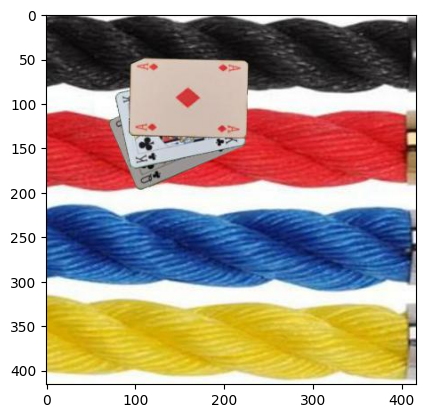

In [27]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

In [30]:
# 框（rectangle）可视化配置
bbox_color = (150, 0, 0)             # 框的 BGR 颜色
bbox_thickness = 6                   # 框的线宽

# 框类别文字
bbox_labelstr = {
    'font_size':6,         # 字体大小
    'font_thickness':14,   # 字体粗细
    'offset_x':0,          # X 方向，文字偏移距离，向右为正
    'offset_y':-80,        # Y 方向，文字偏移距离，向下为正
}

In [31]:
# 关键点 BGR 配色
kpt_color_map = {
    0:{'name':'Nose', 'color':[0, 0, 255], 'radius':25},                # 鼻尖
    1:{'name':'Right Eye', 'color':[255, 0, 0], 'radius':25},           # 右边眼睛
    2:{'name':'Left Eye', 'color':[255, 0, 0], 'radius':25},            # 左边眼睛
    3:{'name':'Right Ear', 'color':[0, 255, 0], 'radius':25},           # 右边耳朵
    4:{'name':'Left Ear', 'color':[0, 255, 0], 'radius':25},            # 左边耳朵
    5:{'name':'Right Shoulder', 'color':[193, 182, 255], 'radius':25},  # 右边肩膀
    6:{'name':'Left Shoulder', 'color':[193, 182, 255], 'radius':25},   # 左边肩膀
    7:{'name':'Right Elbow', 'color':[16, 144, 247], 'radius':25},      # 右侧胳膊肘
    8:{'name':'Left Elbow', 'color':[16, 144, 247], 'radius':25},       # 左侧胳膊肘
    9:{'name':'Right Wrist', 'color':[1, 240, 255], 'radius':25},       # 右侧手腕
    10:{'name':'Left Wrist', 'color':[1, 240, 255], 'radius':25},       # 左侧手腕
    11:{'name':'Right Hip', 'color':[140, 47, 240], 'radius':25},       # 右侧胯
    12:{'name':'Left Hip', 'color':[140, 47, 240], 'radius':25},        # 左侧胯
    13:{'name':'Right Knee', 'color':[223, 155, 60], 'radius':25},      # 右侧膝盖
    14:{'name':'Left Knee', 'color':[223, 155, 60], 'radius':25},       # 左侧膝盖
    15:{'name':'Right Ankle', 'color':[139, 0, 0], 'radius':25},        # 右侧脚踝
    16:{'name':'Left Ankle', 'color':[139, 0, 0], 'radius':25},         # 左侧脚踝
}

# 点类别文字
kpt_labelstr = {
    'font_size':4,             # 字体大小
    'font_thickness':10,       # 字体粗细
    'offset_x':0,             # X 方向，文字偏移距离，向右为正
    'offset_y':150,            # Y 方向，文字偏移距离，向下为正
}

# 骨架连接 BGR 配色
skeleton_map = [
    {'srt_kpt_id':15, 'dst_kpt_id':13, 'color':[0, 100, 255], 'thickness':5},       # 右侧脚踝-右侧膝盖
    {'srt_kpt_id':13, 'dst_kpt_id':11, 'color':[0, 255, 0], 'thickness':5},         # 右侧膝盖-右侧胯
    {'srt_kpt_id':16, 'dst_kpt_id':14, 'color':[255, 0, 0], 'thickness':5},         # 左侧脚踝-左侧膝盖
    {'srt_kpt_id':14, 'dst_kpt_id':12, 'color':[0, 0, 255], 'thickness':5},         # 左侧膝盖-左侧胯
    {'srt_kpt_id':11, 'dst_kpt_id':12, 'color':[122, 160, 255], 'thickness':5},     # 右侧胯-左侧胯
    {'srt_kpt_id':5, 'dst_kpt_id':11, 'color':[139, 0, 139], 'thickness':5},        # 右边肩膀-右侧胯
    {'srt_kpt_id':6, 'dst_kpt_id':12, 'color':[237, 149, 100], 'thickness':5},      # 左边肩膀-左侧胯
    {'srt_kpt_id':5, 'dst_kpt_id':6, 'color':[152, 251, 152], 'thickness':5},       # 右边肩膀-左边肩膀
    {'srt_kpt_id':5, 'dst_kpt_id':7, 'color':[148, 0, 69], 'thickness':5},          # 右边肩膀-右侧胳膊肘
    {'srt_kpt_id':6, 'dst_kpt_id':8, 'color':[0, 75, 255], 'thickness':5},          # 左边肩膀-左侧胳膊肘
    {'srt_kpt_id':7, 'dst_kpt_id':9, 'color':[56, 230, 25], 'thickness':5},         # 右侧胳膊肘-右侧手腕
    {'srt_kpt_id':8, 'dst_kpt_id':10, 'color':[0,240, 240], 'thickness':5},         # 左侧胳膊肘-左侧手腕
    {'srt_kpt_id':1, 'dst_kpt_id':2, 'color':[224,255, 255], 'thickness':5},        # 右边眼睛-左边眼睛
    {'srt_kpt_id':0, 'dst_kpt_id':1, 'color':[47,255, 173], 'thickness':5},         # 鼻尖-左边眼睛
    {'srt_kpt_id':0, 'dst_kpt_id':2, 'color':[203,192,255], 'thickness':5},         # 鼻尖-左边眼睛
    {'srt_kpt_id':1, 'dst_kpt_id':3, 'color':[196, 75, 255], 'thickness':5},        # 右边眼睛-右边耳朵
    {'srt_kpt_id':2, 'dst_kpt_id':4, 'color':[86, 0, 25], 'thickness':5},           # 左边眼睛-左边耳朵
    {'srt_kpt_id':3, 'dst_kpt_id':5, 'color':[255,255, 0], 'thickness':5},          # 右边耳朵-右边肩膀
    {'srt_kpt_id':4, 'dst_kpt_id':6, 'color':[255, 18, 200], 'thickness':5}         # 左边耳朵-左边肩膀
]

In [32]:
for idx in range(num_bbox): # 遍历每个框
    
    # 获取该框坐标
    bbox_xyxy = bboxes_xyxy[idx] 
    
    # 获取框的预测类别（对于关键点检测，只有一个类别）
    bbox_label = results[0].names[0]
    
    # 画框
    img_bgr = cv2.rectangle(img_bgr, (bbox_xyxy[0], bbox_xyxy[1]), (bbox_xyxy[2], bbox_xyxy[3]), bbox_color, bbox_thickness)
    
    # 写框类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
    img_bgr = cv2.putText(img_bgr, bbox_label, (bbox_xyxy[0]+bbox_labelstr['offset_x'], bbox_xyxy[1]+bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color, bbox_labelstr['font_thickness'])
    
    bbox_keypoints = bboxes_keypoints[idx] # 该框所有关键点坐标和置信度
    
    # 画该框的骨架连接
    for skeleton in skeleton_map:
        
        # 获取起始点坐标
        srt_kpt_id = skeleton['srt_kpt_id']
        srt_kpt_x = bbox_keypoints[srt_kpt_id][0]
        srt_kpt_y = bbox_keypoints[srt_kpt_id][1]
        
        # 获取终止点坐标
        dst_kpt_id = skeleton['dst_kpt_id']
        dst_kpt_x = bbox_keypoints[dst_kpt_id][0]
        dst_kpt_y = bbox_keypoints[dst_kpt_id][1]
        
        # 获取骨架连接颜色
        skeleton_color = skeleton['color']
        
        # 获取骨架连接线宽
        skeleton_thickness = skeleton['thickness']
        
        # 画骨架连接
        img_bgr = cv2.line(img_bgr, (srt_kpt_x, srt_kpt_y),(dst_kpt_x, dst_kpt_y),color=skeleton_color,thickness=skeleton_thickness)
        
    # # 画该框的关键点
    # for kpt_id in kpt_color_map:
        
    #     # 获取该关键点的颜色、半径、XY坐标
    #     kpt_color = kpt_color_map[kpt_id]['color']
    #     kpt_radius = kpt_color_map[kpt_id]['radius']
    #     kpt_x = bbox_keypoints[kpt_id][0]
    #     kpt_y = bbox_keypoints[kpt_id][1]
        
    #     # 画圆：图片、XY坐标、半径、颜色、线宽（-1为填充）
    #     img_bgr = cv2.circle(img_bgr, (kpt_x, kpt_y), kpt_radius, kpt_color, -1)
        
    #     # 写关键点类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
    #     kpt_label = str(kpt_id) # 写关键点类别 ID（二选一）
    #     # kpt_label = str(kpt_color_map[kpt_id]['name']) # 写关键点类别名称（二选一）
    #     img_bgr = cv2.putText(img_bgr, kpt_label, (kpt_x+kpt_labelstr['offset_x'], kpt_y+kpt_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, kpt_labelstr['font_size'], kpt_color, kpt_labelstr['font_thickness'])

NameError: name 'bboxes_keypoints' is not defined

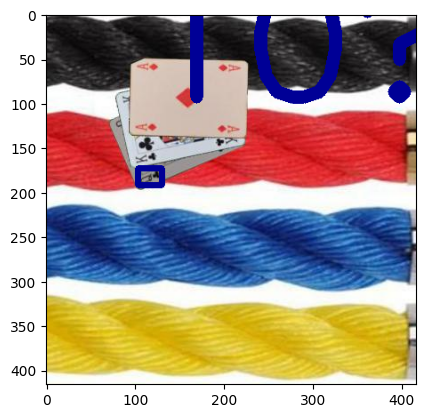

In [34]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

In [27]:
cv2.imwrite('C1_output.jpg', img_bgr)

True